In [3]:
import random
import matplotlib.pyplot as plt

Defining the boolean functions

In [4]:
def AND(a, b): return a and b
def OR(a, b): return a or b
def NOT(a): return not a

Allowed operations

In [5]:
operations = ['AND', 'OR', 'NOT']
variables = ['A', 'B', 'C', 'D', 'E'] 

Target Function

In [6]:
def target_function(A, B, C, D, E):
    return (
        ((A and not (B or C)) or (not A and (B and C))) or (A and B and not C)
    ) and (not (D and E)) or (C and not (D or E))

All combinations for 5 variables

In [7]:
def generate_dataset():
    dataset = []
    for a in [0, 1]:
        for b in [0, 1]:
            for c in [0, 1]:
                for d in [0, 1]:
                    for e in [0, 1]:
                        output = target_function(a, b, c, d, e)
                        dataset.append(((a, b, c, d, e), output))
    return dataset

dataset = generate_dataset()

Random Expression Generator

In [8]:
def random_expression(depth=0):
    if depth > 10 or random.random() < 0.2:  # Deep tree (depth limit = 10)
        return random.choice(variables)
    
    op = random.choice(operations)
    if op == 'NOT':
        return [op, random_expression(depth + 1)]
    else:
        return [op, random_expression(depth + 1), random_expression(depth + 1)]

Evaluate an expression

In [9]:
def evaluate(expr, var_values):
    if type(expr) == str:
        idx = variables.index(expr)
        return var_values[idx]
    
    op = expr[0]
    if op == 'NOT':
        return NOT(evaluate(expr[1], var_values))
    else:
        left = evaluate(expr[1], var_values)
        right = evaluate(expr[2], var_values)
        if op == 'AND':
            return AND(left, right)
        elif op == 'OR':
            return OR(left, right)

 Fitness: number of correct outputs

In [10]:
def fitness(expr):
    score = 0
    for vars_, expected in dataset:
        try:
            output = evaluate(expr, vars_)
            if output == expected:
                score += 1
        except:
            pass
    return score

 Mutation

In [11]:
def mutate(expr):
    if type(expr) == str:
        if random.random() < 0.1:
            return random.choice(variables)
        else:
            return expr
    else:
        if random.random() < 0.2:
            return random_expression()
        else:
            mutated = [expr[0]]
            for sub in expr[1:]:
                mutated.append(mutate(sub))
            return mutated

Crossover

In [12]:
def crossover(expr1, expr2):
    if type(expr1) == str or type(expr2) == str:
        return random.choice([expr1, expr2])

    if expr1[0] == 'NOT' or expr2[0] == 'NOT':
        if expr1[0] == 'NOT' and expr2[0] == 'NOT':
            return ['NOT', crossover(expr1[1], expr2[1])]
        else:
            return random.choice([expr1, expr2])
    
    return [random.choice([expr1[0], expr2[0]]), 
            crossover(expr1[1], expr2[1]), 
            crossover(expr1[2], expr2[2])]

In [13]:
def pretty(expr):
    if type(expr) == str:
        return expr
    if expr[0] == 'NOT':
        return f"NOT({pretty(expr[1])})"
    else:
        return f"({pretty(expr[1])} {expr[0]} {pretty(expr[2])})"

In [14]:
def genetic_programming(generations=100, population_size=100):
    population = [random_expression() for _ in range(population_size)]
    best_scores = []

    for gen in range(generations):
        population = sorted(population, key=lambda x: -fitness(x))
        best_fit = fitness(population[0])
        print(f"Generation {gen}: Best Fitness = {best_fit}")
        best_scores.append(best_fit)

        # Elitism: Keep best 5
        new_population = population[:5]

        # Fill the rest with crossover and mutation
        while len(new_population) < population_size:
            parent1 = random.choice(population[:20])
            parent2 = random.choice(population[:20])
            child = crossover(parent1, parent2)
            child = mutate(child)
            new_population.append(child)

        population = new_population

    best_expr = population[0]
    return best_expr, best_scores

In [15]:
best_expr, fitness_progress = genetic_programming()

Generation 0: Best Fitness = 24
Generation 1: Best Fitness = 24
Generation 2: Best Fitness = 26
Generation 3: Best Fitness = 26
Generation 4: Best Fitness = 26
Generation 5: Best Fitness = 26
Generation 6: Best Fitness = 26
Generation 7: Best Fitness = 26
Generation 8: Best Fitness = 26
Generation 9: Best Fitness = 26
Generation 10: Best Fitness = 26
Generation 11: Best Fitness = 26
Generation 12: Best Fitness = 26
Generation 13: Best Fitness = 26
Generation 14: Best Fitness = 26
Generation 15: Best Fitness = 26
Generation 16: Best Fitness = 26
Generation 17: Best Fitness = 26
Generation 18: Best Fitness = 26
Generation 19: Best Fitness = 26
Generation 20: Best Fitness = 26
Generation 21: Best Fitness = 26
Generation 22: Best Fitness = 26
Generation 23: Best Fitness = 26
Generation 24: Best Fitness = 27
Generation 25: Best Fitness = 27
Generation 26: Best Fitness = 27
Generation 27: Best Fitness = 27
Generation 28: Best Fitness = 27
Generation 29: Best Fitness = 27
Generation 30: Best 

In [16]:
print("\nBest Discovered Expression:")
print(pretty(best_expr))


Best Discovered Expression:
((((D AND (NOT(B) OR NOT(((((D AND NOT(A)) AND (NOT(((((((A AND (NOT((C AND B)) AND ((A OR A) OR NOT(E)))) AND (NOT(D) OR ((E AND (C AND B)) AND ((C OR B) OR (A OR C))))) OR ((((E AND C) OR NOT((C OR D))) AND NOT(A)) OR B)) AND NOT(NOT(NOT(E)))) AND (NOT((((D OR NOT((C OR E))) AND (NOT(E) OR NOT((B OR B)))) OR D)) AND NOT(NOT(NOT((((D AND D) OR NOT(E)) OR ((E AND A) AND NOT(E)))))))) OR NOT(((((E OR (((D OR C) OR NOT(D)) OR E)) OR D) OR D) OR (((((C OR D) OR D) AND NOT((D AND (B OR B)))) OR (((NOT(C) AND (D AND A)) OR (E OR (D AND A))) AND NOT(NOT((A AND A))))) OR NOT(D)))))) AND B)) OR C) AND A)))) AND ((A OR B) AND (NOT((NOT((NOT(NOT(((D AND NOT(C)) AND (NOT(C) OR (E AND A))))) OR E)) AND ((((NOT(NOT((C AND E))) OR (E OR ((E AND C) AND NOT(D)))) AND NOT((((B AND C) OR (B OR A)) AND NOT(E)))) OR ((((NOT(D) OR NOT(D)) AND NOT((E AND E))) OR NOT(((B AND A) OR (D OR B)))) AND ((C OR ((A AND A) AND NOT(C))) AND ((A OR A) OR NOT(E))))) AND ((((((D AND E) AND NO

Plot fitness progress

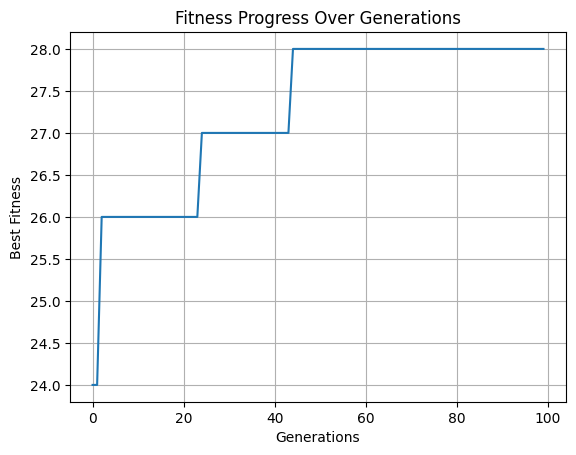

In [17]:
plt.plot(fitness_progress)
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.title('Fitness Progress Over Generations')
plt.grid()
plt.show()